In [1]:
import os, sys
print(os.getcwd())

import warnings
warnings.filterwarnings("ignore")

/home/mainuser/code


In [2]:
from cholect50 import dataloader_tf as dataloader
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

2023-04-10 02:37:24.033564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 02:37:24.771918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# GPU Config
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 2 Logical GPUs


2023-04-10 02:37:26.975033: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 683 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0001:00:00.0, compute capability: 8.0
2023-04-10 02:37:26.976506: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78276 MB memory:  -> device: 1, name: NVIDIA A100 80GB PCIe, pci bus id: 0002:00:00.0, compute capability: 8.0


In [4]:
dataset = dataloader.CholecT50( 
          dataset_dir="CholecT50", 
          dataset_variant="cholect50",
          test_fold=1,
          augmentation_list=['original'],
          num_parallel_calls=100
          )

In [5]:
# build dataset
train_dataset, val_dataset, test_dataset = dataset.build()

In [6]:
# train and val data loaders
train_dataloader = train_dataset.batch(8) # see tf.data.Dataset for more options
val_dataloader   = val_dataset.batch(8)

# test data set is built per video, so load differently
test_dataloaders = []
for video_dataset in test_dataset:
    test_dataloader = video_dataset.batch(8)
    test_dataloaders.append(test_dataloader)
    
train_dataloader = train_dataloader.cache().prefetch(tf.data.AUTOTUNE)
val_dataloader = val_dataloader.cache().prefetch(tf.data.AUTOTUNE)

In [7]:
instruments = [
    "Grasper",
    "Bipolar",
    "Hook",
    "Scissors",
    "Clipper",
    "Irrigator"
]

for (img, (ivt, i, v, t, p)) in train_dataloader.take(1):
    l = [x==1 for x in i.numpy()]

2023-04-10 02:37:27.592350: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-10 02:37:27.592643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-10 02:37:27.814698: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().ta

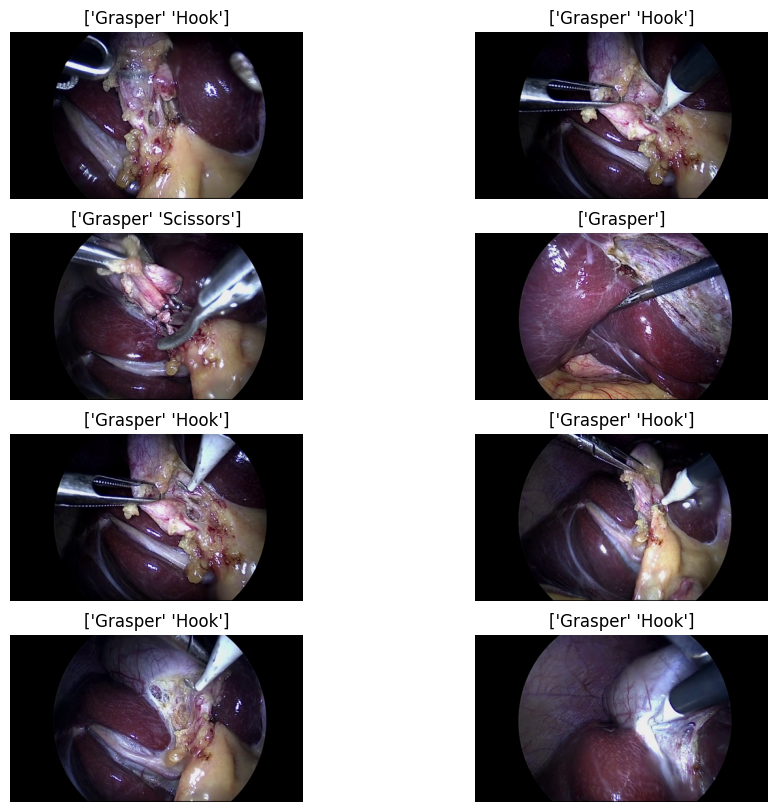

In [8]:
lis = np.array(instruments)
fil = np.array(l)

fig, axs = plt.subplots(4, 2, figsize=(12, 10))

for i in range(4):
    for j in range(2):
        axs[i, j].imshow((img.numpy()[i*2+j]).astype(np.uint8))
        axs[i, j].set_title(str(lis[fil[i*2+j]]))
        axs[i, j].axis('off')

plt.subplots_adjust(wspace=0, hspace=0.2)
plt.show()